# Breast Cancer Tutorial
Introduces Linear Discriminant Analysis (LDA), and Principle Component Analysis (PCA)

In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set up Google Drive
we will need to read and write files to it.

In [115]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [116]:
# example of writing to a file---not used here
#with open('/content/gdrive/My Drive/CIS_3115_Machine_Learning/BreastCancer/ColabTest2.txt', 'w') as f:
#  f.write('Hello Google Drive!')

## Read in the Breast Cancer data into a Panda Dataframe 
dfBreastCancer is the name of the data frame


In [117]:
dfBreastCancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

#with open('/content/gdrive/My Drive/CIS_3115_Machine_Learning/BreastCancer/breast-cancer-wisconsin-data.csv', 'r') as cancer_data_file:
#   dfBreastCancer = pd.read_csv(cancer_data_file)

In [118]:
print (dfBreastCancer.shape)

(569, 33)


In [119]:
dfBreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [120]:
dfBreastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Clean up the data

*   Drop the last collumn which is named "Unnamed" and contains no data (NaN's)
*   Add a second diagnosis collumn which has 0=malignant and 1=benign




In [121]:
dfBreastCancer.drop(['Unnamed: 32', 'id'], axis=1, inplace= True)

In [122]:
# Need to convert "M" and "B" to 0 and 1
from sklearn import preprocessing                  # Import required packages
le = preprocessing.LabelEncoder()                  # Create a label (category) encoder object
# Fit the encoder to the pandas column and save the result into another pandas column
dfBreastCancer['diagnosis_binary'] = le.fit_transform(dfBreastCancer['diagnosis'])

# Select the columns for the input and output to our model

In [123]:
Xall = dfBreastCancer.iloc[:, 1:31]
Yall = dfBreastCancer.iloc[:, 31]

# Scale the data
Most algorithms work best when all parameters are on equal scale. So scale everything to 0-1 range.
See http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [126]:
print ("Data before scaling")
print (Xall)

Data before scaling
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335          122.80     1001.0          0.11840   
1       1.829821     -0.353632          132.90     1326.0          0.08474   
2       1.579888      0.456187          130.00     1203.0          0.10960   
3      -0.768909      0.253732           77.58      386.1          0.14250   
4       1.750297     -1.151816          135.10     1297.0          0.10030   
5      -0.476375     -0.835335           82.57      477.1          0.12780   
6       1.170908      0.160649          119.60     1040.0          0.09463   
7      -0.118517      0.358450           90.20      577.9          0.11890   
8      -0.320167      0.588830           87.50      519.8          0.12730   
9      -0.473535      1.105439           83.97      475.9          0.11860   
10      0.537556      0.919273          102.70      797.8          0.08206   
11      0.469393     -0.325708          103.

In [127]:
# You can do a couple columns at a time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
Xall[['radius_mean', 'texture_mean']] = scaler.fit_transform(Xall[['radius_mean', 'texture_mean']])

In [128]:
print ("Data after scaling radius_mean and texture_mean collumns")
print (Xall)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335          122.80     1001.0          0.11840   
1       1.829821     -0.353632          132.90     1326.0          0.08474   
2       1.579888      0.456187          130.00     1203.0          0.10960   
3      -0.768909      0.253732           77.58      386.1          0.14250   
4       1.750297     -1.151816          135.10     1297.0          0.10030   
5      -0.476375     -0.835335           82.57      477.1          0.12780   
6       1.170908      0.160649          119.60     1040.0          0.09463   
7      -0.118517      0.358450           90.20      577.9          0.11890   
8      -0.320167      0.588830           87.50      519.8          0.12730   
9      -0.473535      1.105439           83.97      475.9          0.11860   
10      0.537556      0.919273          102.70      797.8          0.08206   
11      0.469393     -0.325708          103.60      781.0       

In [129]:
# You can do all the columns at once, but converts from Panda dataframe into NumPy Array
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()  
Xall = scaler.fit_transform(Xall)  


# Question:
1) Can you find a way to scale all the columns while keeping the data in a Panda dataframe?

In [131]:
print ("All columns scalled and also converted into NumPy Array")
print (Xall)

All columns scalled and also converted into NumPy Array
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


# Set up data for training and validation testing
Xtrain = 90% of the patients or rows from the Breast Cancer data <p>
Ytrain = The corresponding diagnosis of the 90% of patients in Xtrain where 0=Benign, 1=Malignant <p>
Xvalid = 10% of the data withheld from training to test the validation of our training <p>
Yvalid = The corresponding diagnosis of the 10% of patients in Xvalid <p>

In [55]:
# Use the last 10% of the patients from validation testing
Xtrain = dfBreastCancer.iloc[0:512, 1:31]
Ytrain = dfBreastCancer.iloc[0:512, 31]
Xvalid = dfBreastCancer.iloc[512:, 1:31]
Yvalid = dfBreastCancer.iloc[512:, 31]


In [56]:
print ("Input training = ",Xtrain.shape, " Input validation = ",Xvalid.shape)
print ("Output training = ",Ytrain.shape, " Output validation = ",Yvalid.shape)

Input training =  (512, 30)  Input validation =  (57, 30)
Output training =  (512,)  Output validation =  (57,)


In [57]:
# Use sklearn to randomly select 10% for test validation
from sklearn.model_selection import train_test_split
Xall = dfBreastCancer.iloc[:, 1:31]
Yall = dfBreastCancer.iloc[:, 31]
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xall, Yall, test_size=0.1)

In [58]:
print ("Input training = ",Xtrain.shape, " Input validation = ",Xvalid.shape)
print ("Output training = ",Ytrain.shape, " Output validation = ",Yvalid.shape)

Input training =  (512, 30)  Input validation =  (57, 30)
Output training =  (512,)  Output validation =  (57,)


# Question:
- Is there an advantage over selecting random rows using the train_test_split() method of simply selecting the last 10% of rows?

# Visualize the Breast Cancer Data
- Look at how the data is corelated and if we can use one of more factors to generate predictions.
- Please look for some other good ways to visualize this data.
## Include graphs like those in 
- https://github.com/sara-kassani/Python-Machine-Learning-Codes/blob/master/Visualization%20-%20Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set.ipynb
- https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic
- https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set

In [15]:
dfBreastCancer.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


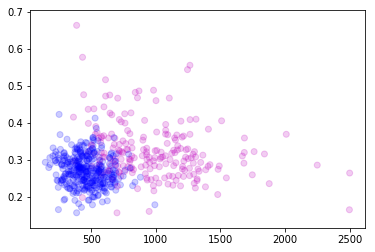

In [16]:
plt.scatter(dfBreastCancer.area_mean, dfBreastCancer.symmetry_worst, alpha=0.2,
            c=dfBreastCancer.diagnosis, cmap='viridis')

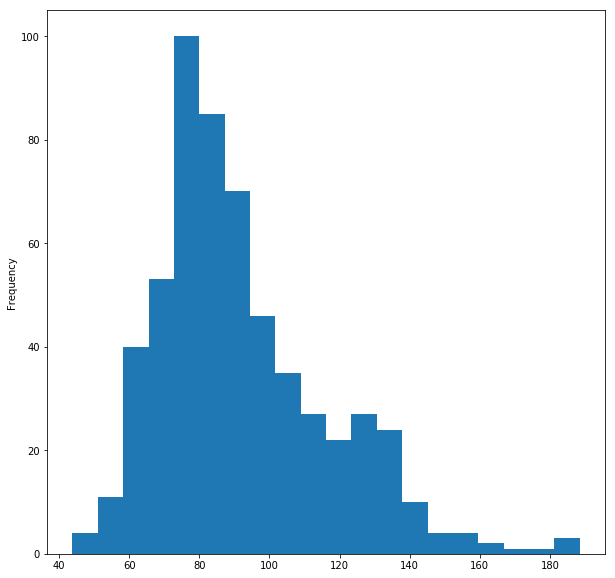

In [17]:
dfBreastCancer.perimeter_mean.plot(kind='hist', bins=20, figsize=(10,10))

C:\Users\tgibbons\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\tgibbons\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\tgibbons\Anaconda3\lib\site-packages\matplotlib\legend.py:590: UserWarning: The handle <matplotlib.patches.Patch object at 0x00000230AD558A20> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


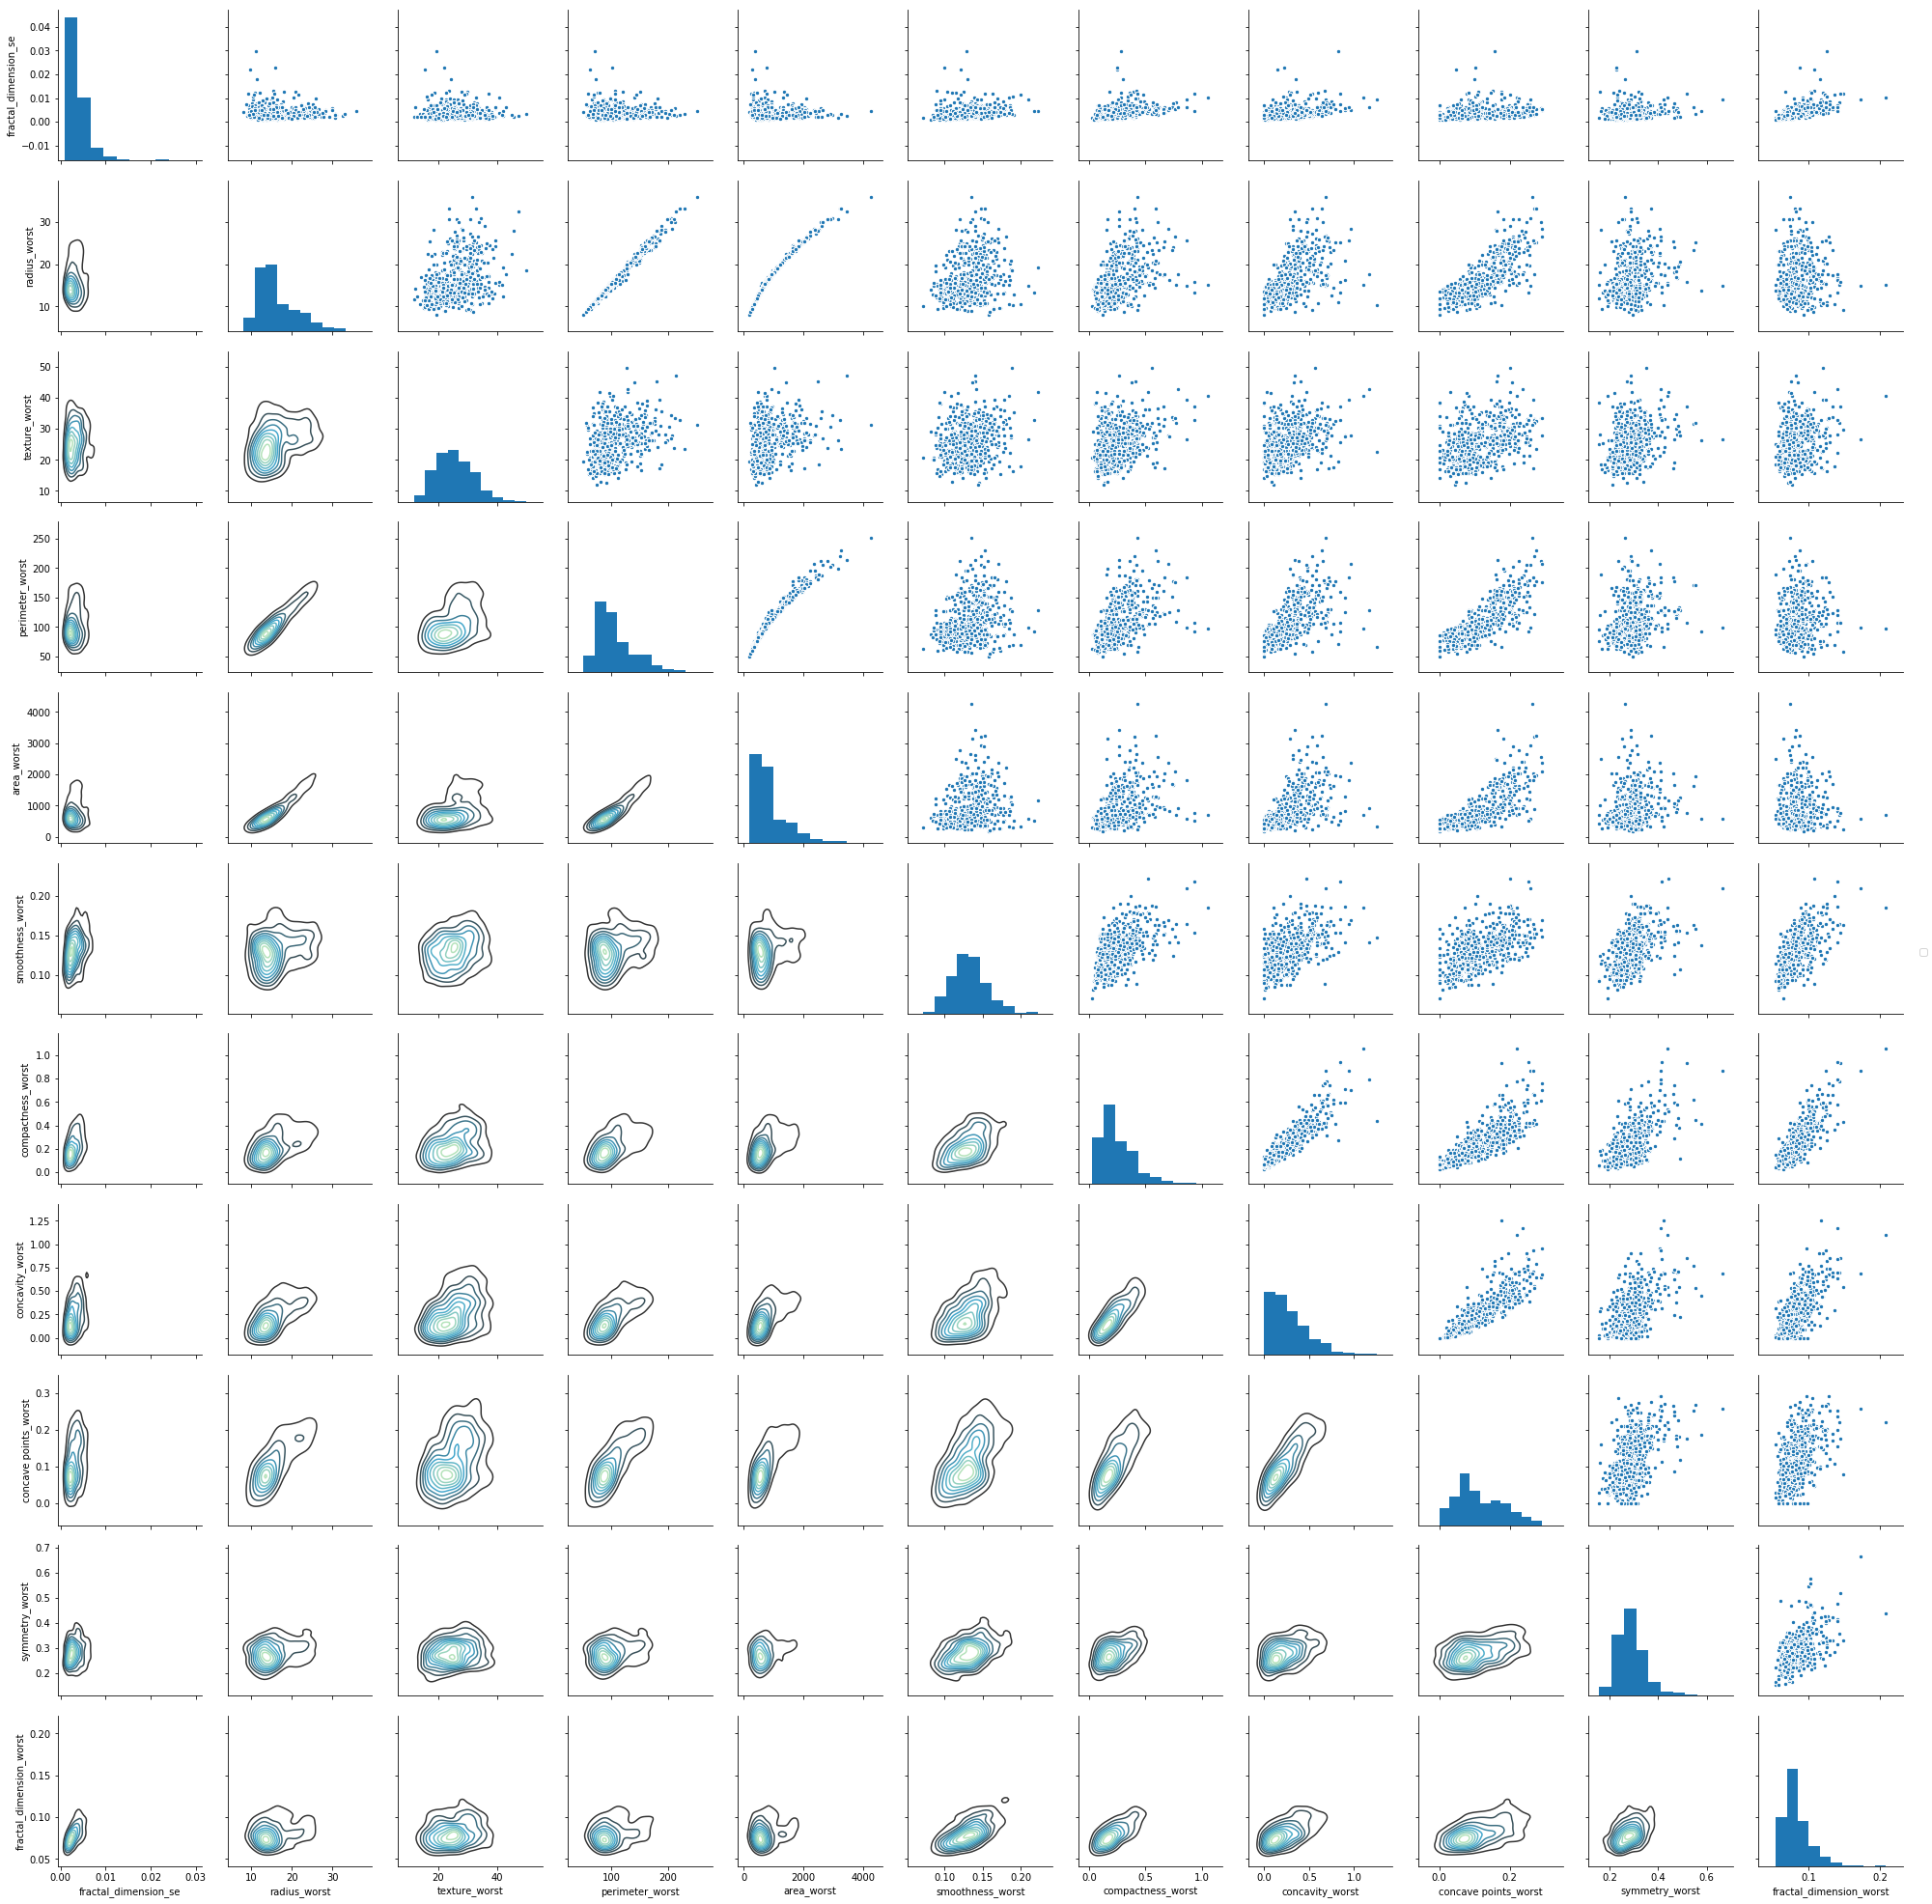

In [18]:
from pandas.tools.plotting import scatter_matrix
p = sns.PairGrid(dfBreastCancer.ix[:,20:32], palette = 'husl')
p.map_upper(plt.scatter, s = 20, edgecolor = 'w')
p.map_diag(plt.hist)
p.map_lower(sns.kdeplot, cmap = 'GnBu_d')
p.add_legend()

p.figsize = (30,30)

# Classifier 
We will try out a couple different classifiers and compare them.
<P>
For a good comparison of classifiers see http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
<P>
We will focus on
    - K-Nearest Neighbors or from sklearn.neighbors import KNeighborsClassifier
    - Support Vector Machines (SVM) or from sklearn.svm import SVC
    - Decision Trees or from sklearn.tree import DecisionTreeClassifier
    - Logistic Regression or from sklearn.linear_model import LogisticRegression
Note, we will first try these models out with parameter reduction methods like PCA or LDA below
    

# To Do:
Look at this notebook (https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic) and copy some of the code from it to do the testing of the four methods above.
- The notebook does PCA, in cells 5 & 6, but we will not do this right away. Our results should be worse therefore.
- The notebook also uses sklearn.grid_search to find the best hyper-parameters. Jenni, you should learn what this is, but we will not use it in this beginner's notebook. We will just manually try a couple different parameters for each classification method.
- Your jobs is to create simple versions/cells that test out the four classificiation methods above. Also link to a resource describing each classificaiton methods. Here is a sample for Decsision Trees below...

# Decision Trees 
This classification method tries to break the classification task into a series of decisions structured as a tree.
Here is a sample from 
![alt text](https://www.kaggleusercontent.com/kf/2033422/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..u5F9n0g9UuOsHQJLi_TLAg.1J1sTswZapVCNcIaEsIXoS79-cOWVLpQGxC34sKjhIWFMpAAVMddy1SC0pdZd4ttwaNRyhsiN5G2puVrhlW9fzLWewkd9Kv20nZHSwc8MKyPg20wzSOtNF3466uKbISGP94aI9fIcVztIRuCW5a85Q.DWVWH29VLcI1ZfvwxOXd5A/__results___files/figure-html/unnamed-chunk-14-1.png "Decision tree diagram from https://www.kaggle.com/shilpyp/breast-cancer-prediction")

For more information on decision trees see:
*   Use https://en.wikipedia.org/wiki/Decision_tree as a reference
*   This is an OK tutorial - https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567





In [137]:
#from sklearn import metrics
#from sklearn import cross_validation as cv
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()

# fitting the optimal model onto the training data
DTclassifier.fit(Xtrain, Ytrain)
# check this classifier against the training data and the validation test data which it has not seen yet
score_train = DTclassifier.score(Xtrain, Ytrain)
score_validation = DTclassifier.score(Xvalid, Yvalid)

print ("Accuracy scores of 0.92 mean the model correctly classified 92% of the samples")
print ("Training scores: ", score_train)
print ("Validation scores: ", score_validation)
print ("You may get different results each time this is run, so try running the cell multiple times")

Accuracy scores of 0.92 mean the model correctly classified 92% of the samples
Training scores:  1.0
Validation scores:  0.8947368421052632
You may get different results each time this is run, so try running the cell multiple times


# Dimensional Reduction
![alt text](http://phdthesis-bioinformatics-maxplanckinstitute-molecularplantphys.matthias-scholz.de/fig_pca_illu3d.png "
Illustrated is the transformation of PCA which reduces a large number of variables (genes) to a lower number of new variables termed principal components (PCs). Three-dimensional gene expression samples are projected onto a two dimensional component space that maintains the largest variance in the data.")
<P>
Decision Reduction tries to map high-dimesional data onto new coordinate systems and reduce the number of variables or dimesions while retaining most of the improtant data
<P>
You may imagine it similar to image compressions, where we compress the data in an image without losing much of the important detail of the image


# Princple Component Analysis - a process for dimensional reduction

- Find a basic tutorial 
- Apply to Breast Cancer Data - see https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic for an example
- Try the four classifiers above after applying PCA and see if they improve.
- Also add graphs showing the results along PC1 and PC2




# Linear Discriminant Analysis (LDA) 

- Do the sample with LDA, making sure you start with the original data, not the PCA data
*


In [140]:
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  
Xtrain_LDA = lda.fit_transform(Xtrain, Ytrain)  
